# Analyzing Restaurants in Ahmedabad

In [0]:
import requests
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import folium
import seaborn as sns
sns.set()

In [0]:
CLIENT_ID = '4EDTWLS3HUX5C4BFIANTNTGN1VGNCDJDNPC5HX3KU2MKM3SP' # your Foursquare ID
CLIENT_SECRET = 'CN3MRIKHFLGVLQEJBLYRBEM0JBYQS1PCNEX0K4GAAEFQNZBN' # your Foursquare Secret
VERSION = '20190913' # Foursquare API version
abad_lat = 23.033863
abad_long = 72.585022
radius = 20000
category_id = '4d4b7105d754a06374d81259'
LIMIT = 100

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                downtor_lat, 
                downtor_long, 
                radius,
                category_id,
                LIMIT)

results = requests.get(url).json()

In [0]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if (len(categories_list) == 0) and (categories_list[0]['id'] != '4d4b7105d754a06374d81259'):
        return None
    else:
        return categories_list[0]['name']

In [4]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Manek Chowk Khau Gali,Snack Place,23.023505,72.588539
1,Manek Chowk,Fast Food Restaurant,23.023626,72.588553
2,TOMATO'S,Mexican Restaurant,23.026693,72.557488
3,Havmor,Indian Restaurant,23.037739,72.565734
4,Swati Snacks,Snack Place,23.024438,72.559087


In [5]:
nearby_venues.shape

(100, 4)

In [0]:
nearby_venues = nearby_venues.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

In [7]:
nearby_venues

,name,categories,lat,lng
0,manek chowk khau gali,snack place,23.023505,72.588539
1,manek chowk,fast food restaurant,23.023626,72.588553
2,tomato's,mexican restaurant,23.026693,72.557488
3,havmor,indian restaurant,23.037739,72.565734
4,swati snacks,snack place,23.024438,72.559087
5,upper crust,diner,23.041185,72.548784
6,dunkin' donuts,donut shop,23.024411,72.556351
7,upper crust,bakery,23.040622,72.527359
8,mocha,café,23.029512,72.554790
9,zencafe,café,23.036322,72.549455


In [0]:
nearby_venues['index'] = nearby_venues.index

In [10]:
nearby_venues

,name,categories,lat,lng,index
0,manek chowk khau gali,snack place,23.023505,72.588539,0
1,manek chowk,fast food restaurant,23.023626,72.588553,1
2,tomato's,mexican restaurant,23.026693,72.557488,2
3,havmor,indian restaurant,23.037739,72.565734,3
4,swati snacks,snack place,23.024438,72.559087,4
5,upper crust,diner,23.041185,72.548784,5
6,dunkin' donuts,donut shop,23.024411,72.556351,6
7,upper crust,bakery,23.040622,72.527359,7
8,mocha,café,23.029512,72.554790,8
9,zencafe,café,23.036322,72.549455,9


In [18]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [22]:
area_df = pd.read_csv('drive/My Drive/venues.csv')
area_df = area_df.rename(columns={'Unnamed: 0': 'index'})
area_df

merged_df = area_df.merge(nearby_venues, on='index')
merged_df

,index,name_x,locality,name_y,categories,lat,lng
0,0,manek chowk khau gali,Khadia,manek chowk khau gali,snack place,23.023505,72.588539
1,1,manek chowk,Khadia,manek chowk,fast food restaurant,23.023626,72.588553
2,2,tomato's,Ellisbridge,tomato's,mexican restaurant,23.026693,72.557488
3,3,havmor,Navrangpura,havmor,indian restaurant,23.037739,72.565734
4,4,swati snacks,Ellisbridge,swati snacks,snack place,23.024438,72.559087
5,5,upper crust,Navrangpura,upper crust,diner,23.041185,72.548784
6,6,dunkin' donuts,Navrangpura,dunkin' donuts,donut shop,23.024411,72.556351
7,7,upper crust,Vastrapur,upper crust,bakery,23.040622,72.527359
8,8,mocha,Navrangpura,mocha,café,23.029512,72.554790
9,9,zencafe,Navrangpura,zencafe,café,23.036322,72.549455


In [23]:
merged_df = merged_df[pd.notnull(merged_df['locality'])]
merged_df

,index,name_x,locality,name_y,categories,lat,lng
0,0,manek chowk khau gali,Khadia,manek chowk khau gali,snack place,23.023505,72.588539
1,1,manek chowk,Khadia,manek chowk,fast food restaurant,23.023626,72.588553
2,2,tomato's,Ellisbridge,tomato's,mexican restaurant,23.026693,72.557488
3,3,havmor,Navrangpura,havmor,indian restaurant,23.037739,72.565734
4,4,swati snacks,Ellisbridge,swati snacks,snack place,23.024438,72.559087
5,5,upper crust,Navrangpura,upper crust,diner,23.041185,72.548784
6,6,dunkin' donuts,Navrangpura,dunkin' donuts,donut shop,23.024411,72.556351
7,7,upper crust,Vastrapur,upper crust,bakery,23.040622,72.527359
8,8,mocha,Navrangpura,mocha,café,23.029512,72.554790
9,9,zencafe,Navrangpura,zencafe,café,23.036322,72.549455


In [33]:
merged_df['name'] = np.where(merged_df['name_x'] == merged_df['name_y'], merged_df['name_x'], np.NaN)
del merged_df['name_x']
del merged_df['name_y']
del merged_df['index']
merged_df

,locality,categories,lat,lng,name
0,Khadia,snack place,23.023505,72.588539,manek chowk khau gali
1,Khadia,fast food restaurant,23.023626,72.588553,manek chowk
2,Ellisbridge,mexican restaurant,23.026693,72.557488,tomato's
3,Navrangpura,indian restaurant,23.037739,72.565734,havmor
4,Ellisbridge,snack place,23.024438,72.559087,swati snacks
5,Navrangpura,diner,23.041185,72.548784,upper crust
6,Navrangpura,donut shop,23.024411,72.556351,dunkin' donuts
7,Vastrapur,bakery,23.040622,72.527359,upper crust
8,Navrangpura,café,23.029512,72.554790,mocha
9,Navrangpura,café,23.036322,72.549455,zencafe


In [0]:
 merged_df.at[55, 'categories'] = 'sandwich place'

In [50]:
map_abad = folium.Map(location=[abad_lat, abad_long], zoom_start=10)

for lat, lng, locality, name in zip(merged_df['lat'], merged_df['lng'], merged_df['locality'], merged_df['name']):
    label = '{}, {}'.format(name, locality)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FF0000',
        fill_opacity=0.7,
        parse_html=False).add_to(map_abad)  
    
map_abad

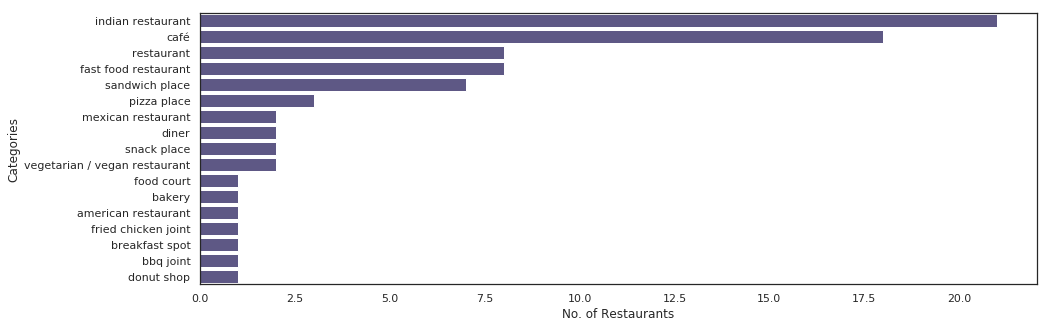

In [83]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(style="white")
category_plot = sns.barplot(x=merged_df.categories.value_counts(), y=merged_df.categories.value_counts().index, orient='h', color= '#58508d')
category_plot.set(xlabel='No. of Restaurants', ylabel='Categories')
category_plot

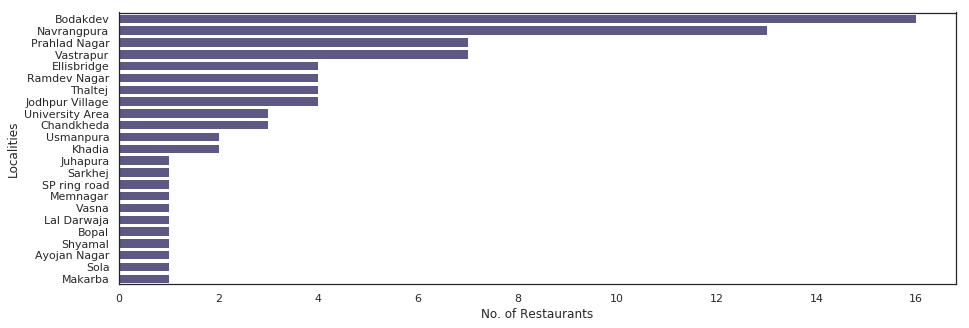

In [84]:
venue_plot = sns.barplot(x=merged_df.locality.value_counts(), y=merged_df.locality.value_counts().index, orient='h',color= '#58508d')
venue_plot.set(xlabel='No. of Restaurants', ylabel='Localities')
venue_plot

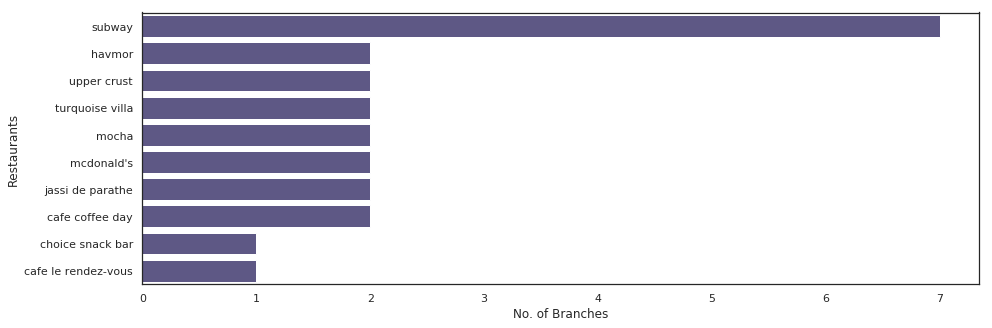

In [85]:
name_plot = sns.barplot(x=merged_df.name.value_counts().iloc[:10], y=merged_df.name.value_counts().iloc[:10].index, orient='h',color= '#58508d')
name_plot.set(xlabel='No. of Branches', ylabel='Restaurants')
name_plot